<a href="https://colab.research.google.com/github/akklevin/Diabetes-Prediction/blob/main/ML_ASSIGNMENT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 2

DSCI 6601: Practical Machine Learning

Name: Sarim Ahmed

Date: 09-Oct-2024


---

We selected a Kaggle dataset with at least five features that is openly accessible for this assignment. The objective is to construct a Decision Tree Classifier based on the characteristics of our dataset. We will assess how well the model performs and study the impact of the features on the predictions.

 Link for the dataset- https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes

# **IMPORT THE LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Task 1: DATASET OVERVIEW

we will be providing a simple overview of the dataset-such as feature names, target variable, whether any missing values are present, and which features might be categorical.

In [ ]:
diabetesData = pd.read_csv('Healthcare-Diabetes.csv')
diabetesData.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print(diabetesData.shape)  # TO COUNT THE ROWS AND COLUMNS

(2768, 10)


In [ ]:
diabetesData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB




*   FEATURES NAME AND TARGET VARIABLE



In [ ]:
print("FEATURES NAMES:", diabetesData.columns.tolist()[:-1])  # FEATURE NAMES
print("TARGET VARIABLE:", diabetesData.columns.tolist()[-1].upper())  # TARGET VARIABLE

X = diabetesData.drop('Outcome', axis=1)  # Features
y = diabetesData['Outcome']  # Target variable

FEATURES NAMES: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
TARGET VARIABLE: OUTCOME



*    PRESENCE OF MISSING VALUES




In [ ]:
print(diabetesData.isnull().sum()) #TO CHECK THE PRESENCE OF MISSING VALUES

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
[col for col in diabetesData.columns if diabetesData[col].dtype == 'object']


[]

The Above output is empty because all the columns in diabetes dataset are of numeric type.

# TASK 2: DATA PREPROCESSING

We would now see how we would preprocess the dataset before building a Decision Tree model. we will see steps like handling missing values, encoding categorical features, and scaling features, if necessary.

In [ ]:
diabetesData = diabetesData.drop('Id', axis=1) # Dropping Id as it's not a relavant feature in prediction
diabetesData.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetesData.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


we can see that there are no missing values therefore we can proceed

In [ ]:
diabetesData.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Since the data is entirely numerical, there's no need to apply one-hot encoding.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

(X_scaled_df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.318182,0.000000,0.416873,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.263636,0.000000,0.330025,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.289082,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.209091,0.111111,0.348635,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.318182,0.198582,0.534739,0.943638,0.200000


We have completed the data preprocessing steps

# TASK 3: MODEL IMPLEMENTATION



*   Now, we're going to use Scikit-learn to implement a Decision Tree classifier.
*   We will explain how we would split the data into training and testing sets, train the model, and evaluate it using appropriate metrics.



In [ ]:
X = diabetesData.drop('Outcome', axis=1)  # Features
y = diabetesData['Outcome']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)
#Splitting the data into 70% Training Data and 30% Testing Data


In [ ]:
dtClassifier = DecisionTreeClassifier() # Model Initialisation


In [ ]:
dtClassifier.fit(X_train, y_train)  # Fiting the Model with Training Data


DecisionTreeClassifier()

In [ ]:
# Predicting the Test set results
y_pred = dtClassifier.predict(X_test)

After the implementation of our model we will now check our model performance using metrics like **Accuracy score** and **Confusion matrix**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy of DT Classifier:", accuracy)


Accuracy of DT Classifier: 0.9819494584837545


Below is a visualization of the trained Decision Tree; with max depth to 3 starting from the root, the model will make decisions depending on features.

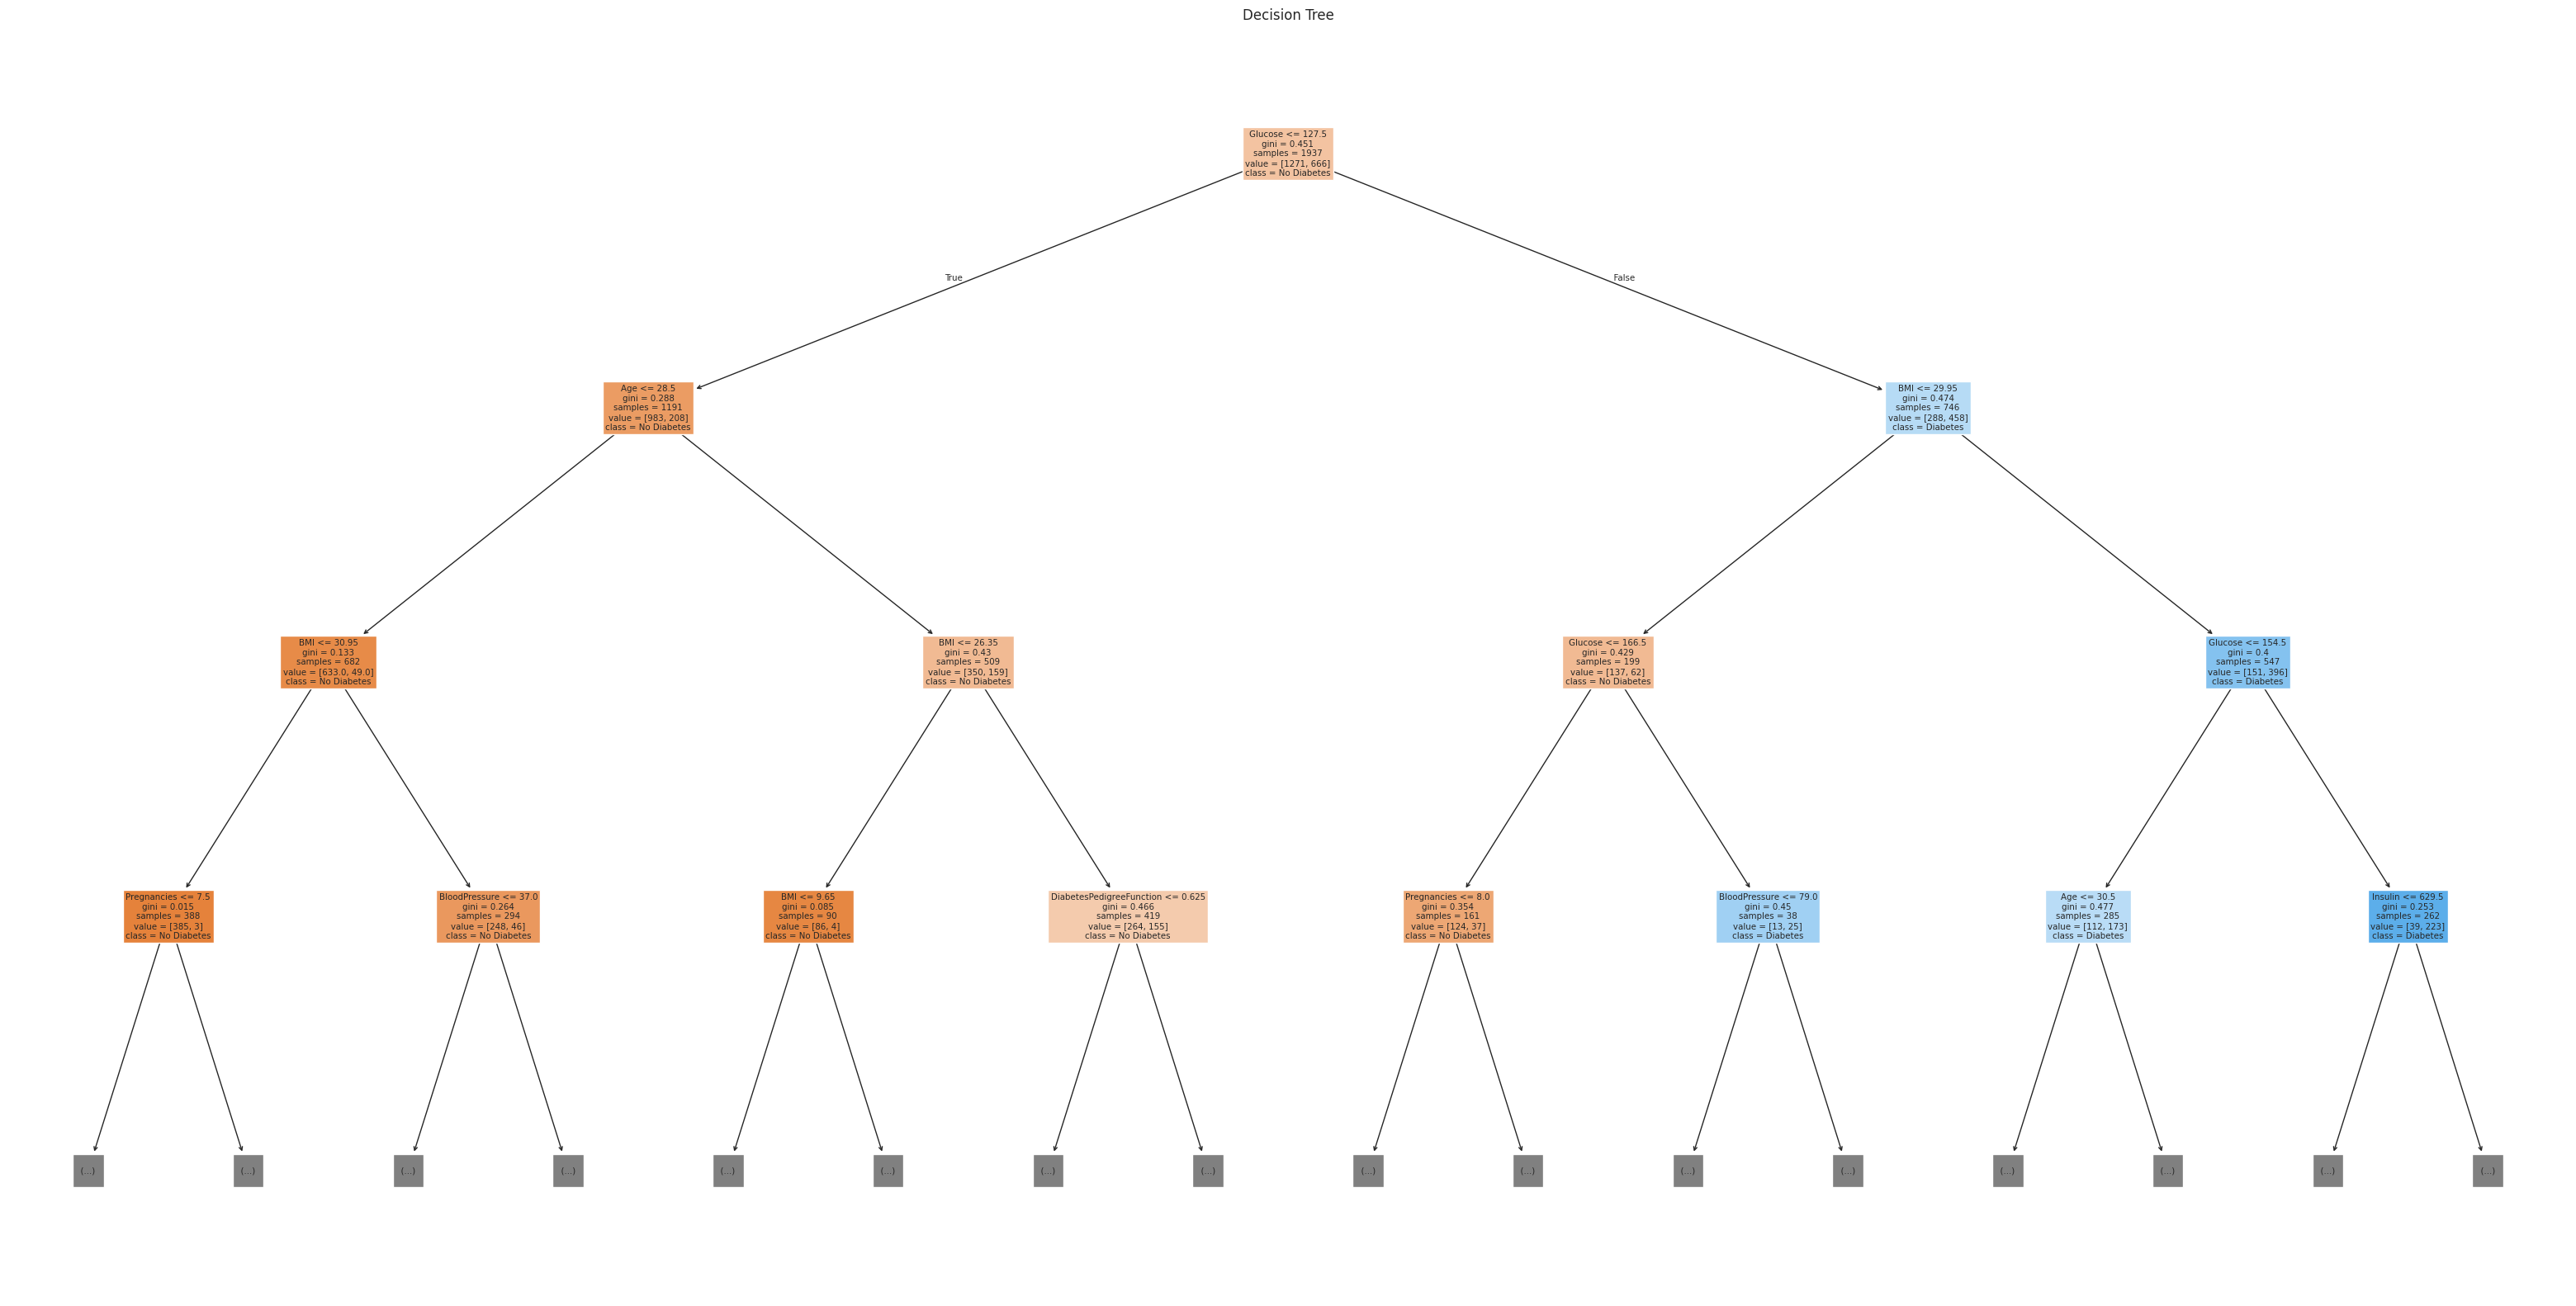

In [ ]:
plt.figure(figsize=(40, 20))
plot_tree(dtClassifier, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], max_depth=3)
plt.title("Decision Tree")
plt.show()

Now from the Visualisation we can clearly see that the splitting happens based on the feature named **Glucose** with lower gini impurity

Now we will plot a Scatterplot of Glucose vs Outcome


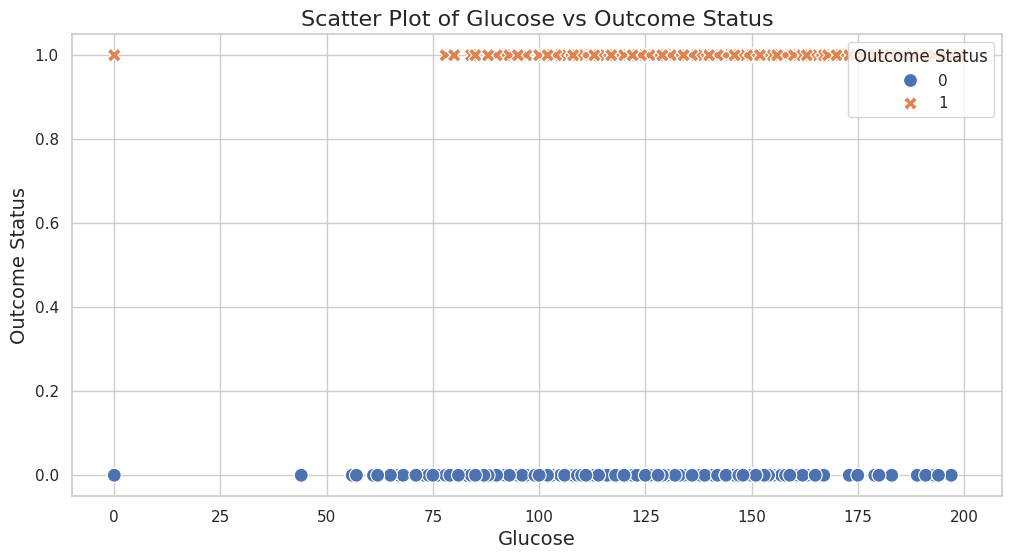

In [ ]:
sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
sns.scatterplot(data=diabetesData, x='Glucose', y='Outcome', hue='Outcome', style='Outcome', palette='deep', s=100)

plt.title('Scatter Plot of Glucose vs Outcome Status', fontsize=16)
plt.xlabel('Glucose', fontsize=14)
plt.ylabel('Outcome Status', fontsize=14)
plt.legend(title='Outcome Status', loc='upper right')
plt.grid(True)

# Show the plot
plt.show()

The scatter plot shows there is a strong relationship between glucose levels and outcome status. Higher glucose levels are associated with higher probability of an outcome status of **1(Diabetic)**.

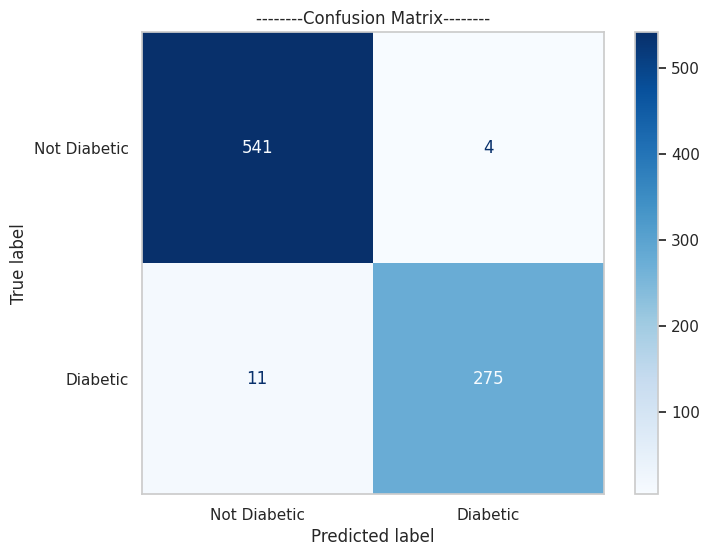

In [ ]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay(cm, display_labels=['Not Diabetic', 'Diabetic']).plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title('--------Confusion Matrix--------')
plt.grid(False)
plt.show()


Breakdown of the confusion matrix:

True Positives (TP): 275 instances that were correctly predicted as diabetic.
True Negatives (TN): 541 instances that were correctly predicted as not diabetic.
False Positives (FP): 4 instances that were incorrectly predicted as diabetic.
False Negatives (FN): 11 instances that were incorrectly predicted as not diabetic.

# TASK 4: Feature Importance


*   We will now extract and visualise the feature importance scores that help understand which features contribute the most to the predictions.
* We will try to refine the model using the obtained information



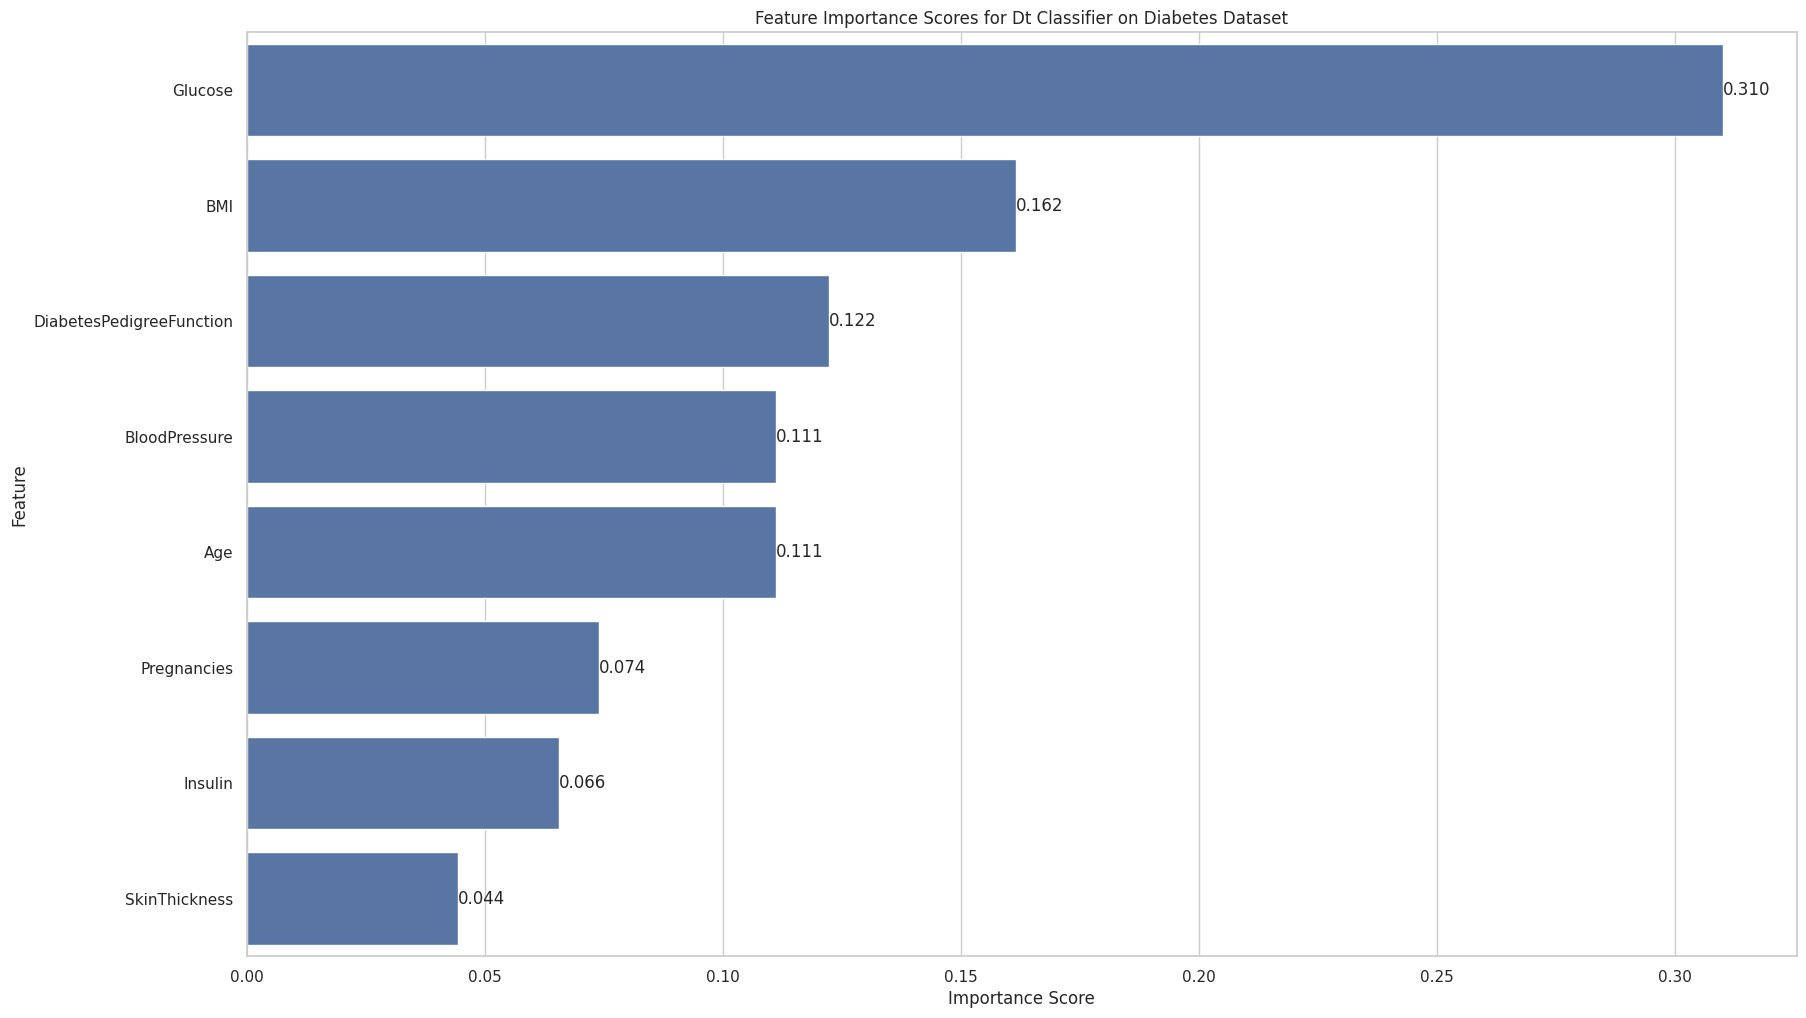

In [ ]:
# Extract feature importance scores
featureImportance = dtClassifier.feature_importances_

# Create a DataFrame for better visualization
featuresDF = pd.DataFrame({
    'Feature': X.columns,  # Column names from the dataset
    'Importance': featureImportance  # Corresponding importance scores
})


featuresDF = featuresDF.sort_values(by='Importance', ascending=False) # Sort the features by importance score

plt.figure(figsize=(20, 12)) #plot
ax = sns.barplot(x='Importance', y='Feature', data=featuresDF)
plt.title('Feature Importance Scores for Dt Classifier on Diabetes Dataset')
plt.xlabel('Importance Score')
plt.ylabel('Feature')

for index, value in enumerate(featuresDF['Importance']):
    ax.text(value, index, f'{value:.3f}', va='center')  # Format to 3 decimal places
plt.show()

The above bar plot gives us an overview of the importance scores of the different features.

*   Now to refine the model's accuracy we will try to remove the feature whose importance score is less than **0.05** and then rebuilt the model




Accuracy of New DT Classifier: 0.9819494584837545

Accuracy of DT Classifier: 0.9819494584837545


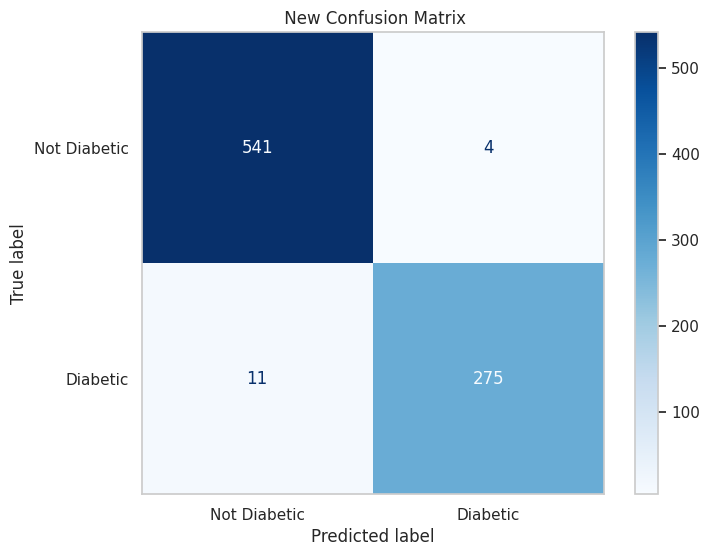

In [ ]:
# Sort the features by importance score
featuresDF = featuresDF.sort_values(by='Importance', ascending=False)

# Defining a threshold for dropping features
threshold = 0.05

# Get the list of features to drop
features_to_drop = featuresDF[featuresDF['Importance'] < threshold]['Feature'].tolist()

# Drop features from the dataset
X_dropped = diabetesData.drop(columns=features_to_drop)  # Updated DataFrame with dropped features

X = X_dropped.drop('Outcome', axis=1)  #Features
y = X_dropped['Outcome']  # Target Variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

dtClassifier = DecisionTreeClassifier(random_state=42)

dtClassifier.fit(X_train, y_train)

y_pred = dtClassifier.predict(X_test)

exp1_accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy of New DT Classifier:", exp1_accuracy) #New accuracy
print("\nAccuracy of DT Classifier:", accuracy)

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay(cm, display_labels=['Not Diabetic', 'Diabetic']).plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title(' New Confusion Matrix')
plt.grid(False)
plt.show()

We observe that removing the features with a threshold score less than 0.05 from the dataset results in no improvement in accuracy

# CONCLUSION
After retrieving the dataset from Kaggle we,


1. Performed data preprocessing where we came across steps like steps handling missing values, encoding categorical features, and scaling features
2. A Decision Tree Classifier model was successfully built and evaluated to predict the outcomes of Patients.
3. The model with a good fit showed an accuracy score of **98%** and, further, we have constructed the confusion matrix as well for the evaluation of the model.

4. The results of confusion matrix were:
True Positives (TP): 275 instances that were correctly predicted as diabetic.
True Negatives (TN): 541 instances that were correctly predicted as not diabetic.
False Positives (FP): 4 instances that were incorrectly predicted as diabetic.
False Negatives (FN): 11 instances that were incorrectly predicted as not diabetic.

5. We then ranked the features and in order to improve the accuracy  used a threshold of **0.05** and removed the least important feature

6. After dropping the least important feature there no improvement in accuracy



